In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Remove ID and features with 30% or less NaN
df = df[[col for col in df if df[col].count() / len(df) >= 0.3]]
del df['Id']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


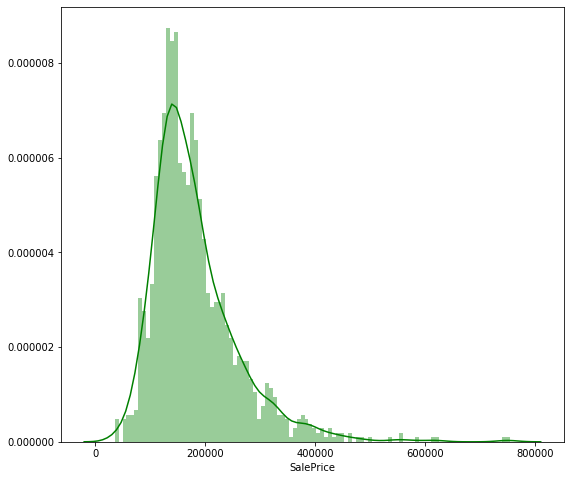

In [5]:
print(df["SalePrice"].describe())
plt.figure(figsize = (9, 8))
sns.distplot(df["SalePrice"], color = 'g', bins = 100, hist_kws = {'alpha' : 0.4})

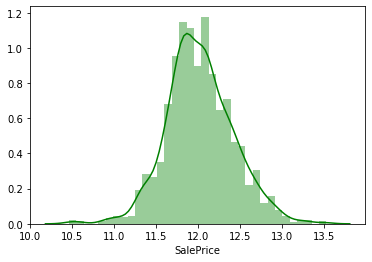

In [6]:
logSalePrices = df["SalePrice"].apply(lambda x : np.log(x))
sns.distplot(logSalePrices, color = 'g')

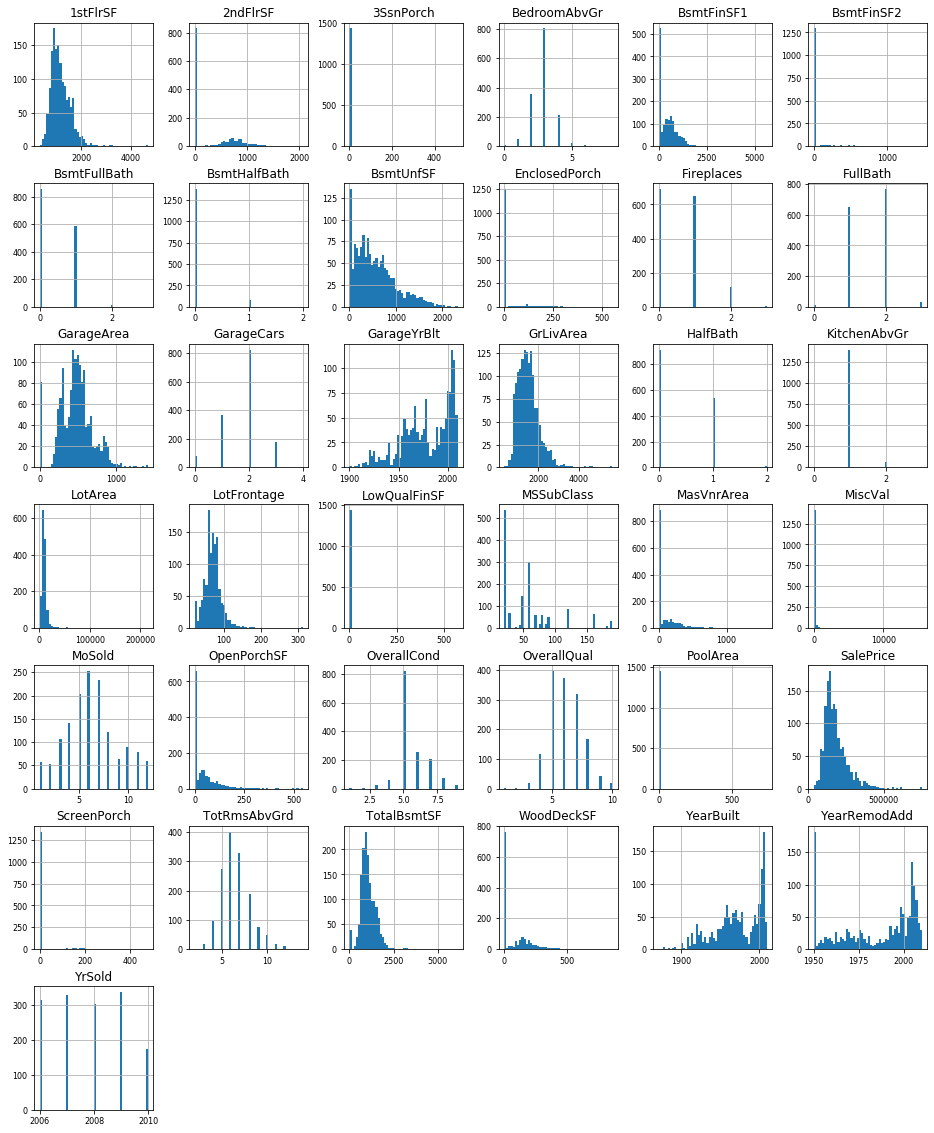

In [7]:
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (16, 20), bins = 50, xlabelsize = 8, ylabelsize = 8);

In [8]:
df_num_corr = df_num.corr()['SalePrice'][: -1] # We remove SalePrice
golden_feature_list = df_num_corr[abs(df_num_corr) >= 0.5].sort_values(ascending = False)
print(golden_feature_list)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [9]:
# Not working for some reason
"""
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data = df_num,
                x_vars = df_num.columns[i : i + 5],
                y_vars = df_num['SalePrice'])
"""

"\nfor i in range(0, len(df_num.columns), 5):\n    sns.pairplot(data = df_num,\n                x_vars = df_num.columns[i : i + 5],\n                y_vars = df_num['SalePrice'])\n"

In [52]:
cleaned_corr = []
for i in range(len(df_num.columns) - 1): # Ignore SalePrice
    temp_df = df_num[[df_num.columns[i], "SalePrice"]]
    temp_df = temp_df[temp_df[temp_df.columns[0]] != 0]

    cleaned_corr.append(temp_df)

correlations = {feat.columns[0]: feat.corr()['SalePrice'][0] for feat in cleaned_corr}
golden_feature_expanded = dict(filter(lambda pair: abs(pair[1]) >= 0.5, correlations.items()))
print(golden_feature_expanded)

{'OverallQual': 0.7909816005838047, 'YearBuilt': 0.5228973328794967, 'YearRemodAdd': 0.5071009671113867, 'TotalBsmtSF': 0.6096808188074366, '1stFlrSF': 0.6058521846919166, '2ndFlrSF': 0.6733048324568383, 'GrLivArea': 0.7086244776126511, 'FullBath': 0.5745626737760816, 'TotRmsAbvGrd': 0.5337231555820238, 'GarageCars': 0.6370954062078953, 'GarageArea': 0.6084052829168343}


KeyError: 'TotalBsmtSF'

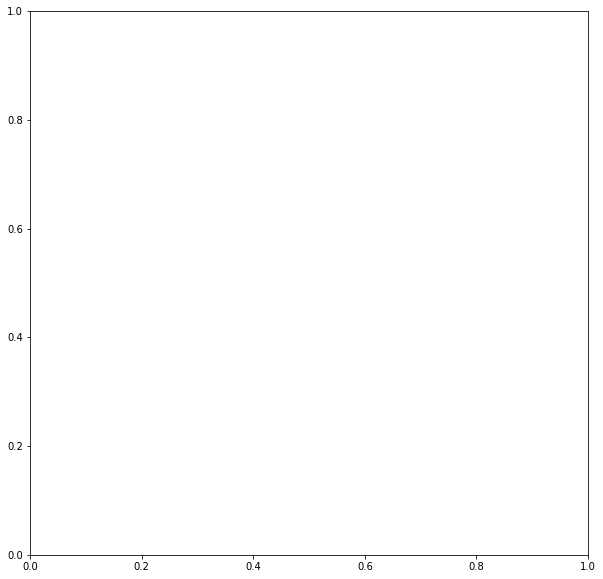

In [51]:
quantitative_feature_list = ['TotalBsmtSF', 'SalePrice']
df_quant_values = df_num[quantitative_feature_list]

fig, ax = plt.subplots(1, 1, figsize = (10, 10))
for i, ax in enumerate(fig.axes):
    sns.regplot(x = df_quant_values.columns[i], y = 'SalePrice', data = df[df_quant_values.columns[i]], ax = ax)
        
#sns.regplot(x = df_quant_values.columns[0], y = 'SalePrice', data = df_quant_values[df_quant_values.columns[0]], ax = ax)